[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1RTTgkDdDDkPdZd6vt4MoCV66BRbWgcRx?usp=sharing)

# K-Means Clustering Algorithm

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
X, y = data.iloc[:, 1:].values, data.iloc[:, 0].values

In [5]:
N, d = X.shape
print("Num. samples: ", N)
print("Num. features/variables: ", d)

Num. samples:  178
Num. features/variables:  13


In [6]:
# Hyper-parameters
K_CLUSTERS = 3 # << N 

In [7]:
import random
# random K-samples to be centroids
k_indices = random.sample(range(0, N), K_CLUSTERS)
centroids = X[k_indices]    # shape: (K, d)
print(centroids.shape); print(centroids)

(3, 13)
[[1.247e+01 1.520e+00 2.200e+00 1.900e+01 1.620e+02 2.500e+00 2.270e+00
  3.200e-01 3.280e+00 2.600e+00 1.160e+00 2.630e+00 9.370e+02]
 [1.288e+01 2.990e+00 2.400e+00 2.000e+01 1.040e+02 1.300e+00 1.220e+00
  2.400e-01 8.300e-01 5.400e+00 7.400e-01 1.420e+00 5.300e+02]
 [1.187e+01 4.310e+00 2.390e+00 2.100e+01 8.200e+01 2.860e+00 3.030e+00
  2.100e-01 2.910e+00 2.800e+00 7.500e-01 3.640e+00 3.800e+02]]


In [8]:
# Remark
from scipy.spatial import distance 
A = np.array([[1, 2],
              [0, 3],
              [1, 4]])

B = np.array([[1, -1],
              [2, -1]])

C = distance.cdist(A, B) # euclidean distance, distance(x,y) = ||x-y||

# C[0,0] = 3. = ||[1, 2] - [1, -1]||
# C[0,1] = 3.1622 = ||[1, 2] - [2, -1]||
# C[1,0] = 4.12 = ||[0, 3] - [1, -1]||
# C[1,1] = ...

In [9]:
        #k=    0  1  2
D = np.array([[1, 0, 3],   # x_1 y_1 = 1
              [-1, 2, 1]]) # x_2 y_2 = 0

np.argmin(D, axis=1)

array([1, 0], dtype=int64)

In [10]:
# helpers 
def assign_cluster(distances: np.ndarray) -> np.ndarray:
    # distances: (N, K)
    # 
    return np.argmin(distances, axis=1)

def has_convert(pre_labels: np.ndarray, cur_labels: np.ndarray) -> bool:
    return (pre_labels == cur_labels).all()

def update_centroids(X, labels):
    new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(K_CLUSTERS)])
    return new_centroids # (3, 13)

def get_total_wcv(X, labels, centroids):
    # Total within cluster variance
    WCVs = [
        np.sum(np.linalg.norm(X[labels == k] - centroids[k], axis=1) ** 2) \
        for k in range(K_CLUSTERS)
    ]
    return np.sum(WCVs)

# K-mean Algorithm

In [11]:
# initialize labels
pre_labels = np.zeros((N, 1))

# training
it = 0
while True:
    # compute distances from X_i to
    distances = distance.cdist(X, centroids) # shape: (N, K)
    # assign new labels
    labels = assign_cluster(distances) # [0, 0, 1, 0, ..., 2, 1, 0, 1]
    # check convergence
    if has_convert(pre_labels, labels):
        break
    # compute total within cluster variance
    wcv = get_total_wcv(X, labels, centroids)
    print(f">> iters: {it} - wcv: {wcv}")
    # update centroids
    centroids = update_centroids(X, labels) # 0->(x_i s.t y_i == 0).mean(), # 1->(x_i s.t y_i == 1).mean()
    # update old labels
    pre_labels = labels

    it += 1

>> iters: 0 - wcv: 5946906.250507
>> iters: 1 - wcv: 3560589.4004655518
>> iters: 2 - wcv: 3041022.400916476
>> iters: 3 - wcv: 2614186.6088793543
>> iters: 4 - wcv: 2463787.220903917
>> iters: 5 - wcv: 2381982.9894820517
>> iters: 6 - wcv: 2371249.446583612


In [12]:
# compute total within cluster variance
wcv = get_total_wcv(X, labels, centroids)
wcv

2370689.686782968

In [13]:
centroids

array([[1.38044681e+01, 1.88340426e+00, 2.42617021e+00, 1.70234043e+01,
        1.05510638e+02, 2.86723404e+00, 3.01425532e+00, 2.85319149e-01,
        1.91042553e+00, 5.70255319e+00, 1.07829787e+00, 3.11404255e+00,
        1.19514894e+03],
       [1.29298387e+01, 2.50403226e+00, 2.40806452e+00, 1.98903226e+01,
        1.03596774e+02, 2.11112903e+00, 1.58403226e+00, 3.88387097e-01,
        1.50338710e+00, 5.65032258e+00, 8.83967742e-01, 2.36548387e+00,
        7.28338710e+02],
       [1.25166667e+01, 2.49420290e+00, 2.28855072e+00, 2.08231884e+01,
        9.23478261e+01, 2.07072464e+00, 1.75840580e+00, 3.90144928e-01,
        1.45188406e+00, 4.08695651e+00, 9.41159420e-01, 2.49072464e+00,
        4.58231884e+02]])

In [14]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy.spatial import distance

class KMeansClustering:
    """
        An instance of K-Means Clustering algorithm
    """
    def __init__(self, n_clusters=8):
        """
            n_clusters: number of clusters
            _centroids: center/ centroid of clusters
            inertia_: sum of squared distances of samples to their closest cluster center
            labels_: labels of input samples
            X: input data
        """
        self.n_clusters = n_clusters
    
    def fit(self, X: np.ndarray) -> None:
        N, p = X.shape
        self.X = X

        # random K-samples to be centroids
        k_indices = random.sample(range(0, N), self.n_clusters)
        self._centroids = self.X[k_indices]

        # initialize labels
        pre_labels = np.zeros((N, 1))

        # training
        it = 0
        while True:
            # compute distances from X_i to
            distances = self._calc_dists(self.X, self._centroids)
            # assign new labels
            self.labels_ = self._assign_cluster(distances)  # assign new labels
            # check convergence
            if self._has_convert(pre_labels, self.labels_):
                break
            # update centroids
            self._update_centroids(self.X, self.labels_)
            pre_labels = self.labels_
            it += 1

        # compute total Within Cluster Variance (WCV)
        self.inertia_ = self._calc_total_WCV(self.X, self.labels_, self._centroids)

    def _calc_dists(self, X, centroids):
        return distance.cdist(X, centroids, "euclidean")

    def _assign_cluster(self, distances):
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        self._centroids = np.array(
            [X[labels == k].mean(axis=0) for k in range(self.n_clusters)]
        )

    def _calc_total_WCV(self, X, labels, centroids):
        WCVs = [
            np.sum(np.linalg.norm(X[labels == k] - centroids[k], axis=1) ** 2)
            for k in range(self.n_clusters)
        ]
        return np.sum(WCVs)

    def _has_convert(self, pre_labels, cur_labels):
        return (pre_labels == cur_labels).all()

    def _predict(self, X_test):
        dist_test = self._calc_dists(X_test, self._centroids)
        test_labels = self._assign_cluster(dist_test)
        return test_labels

    def predict(self, X_test):
        return self._predict(X_test)

In [15]:
def elbow_method(X, k_clusters=[1, 3, 5, 7, 9]):
    total_wcss = []
    for k in k_clusters:
        kmeans_model = KMeansClustering(n_clusters=k)
        kmeans_model.fit(X)
        total_wcss.append(kmeans_model.inertia_)

    plt.figure()
    plt.plot(k_clusters, total_wcss, marker='o', color='r')
    plt.ylabel('Total WSS')
    plt.xlabel('Number of cluster')
    plt.show()

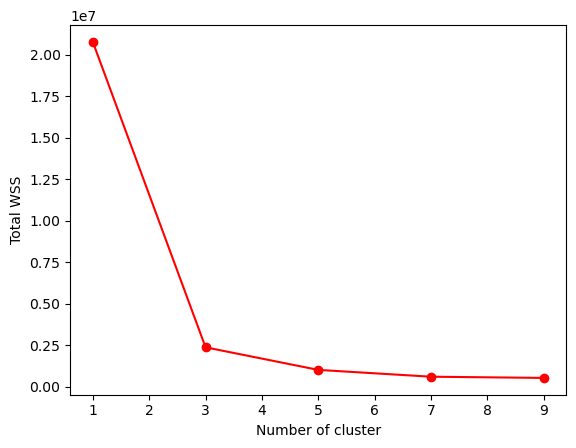

In [16]:
elbow_method(X)

In [17]:
# Perform PCA for dimension reduction in order to visualize outcome.
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

print('Explained variance ratio of the chosen components:\n', np.cumsum(pca.explained_variance_ratio_))

Explained variance ratio of the chosen components:
 [0.99809123 0.99982715 0.99992211]


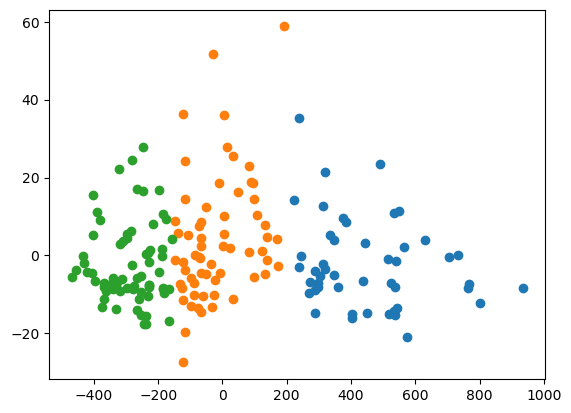

In [18]:
# 2D visualization
for k in range(K_CLUSTERS):
    plt.scatter(X_pca[labels == k, :][:, 0], X_pca[labels == k, :][:, 1])
plt.show()

In [19]:
# 3D visualization

import matplotlib.pyplot as plt
import plotly.express as px # package for 3D visualization
# scatter with predicted clusters
fig = px.scatter_3d(X_pca, 
                    x=X_pca[:,0], 
                    y=X_pca[:,1], 
                    z=X_pca[:,2], 
                    color=labels, 
                    width=800, 
                    height=400)
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [20]:
def predict(centroids, X_test):
    dist_test = distance.cdist(X_test, centroids)
    test_labels = assign_cluster(dist_test)
    return test_labels

test_point = np.array([9.1, 7.8, 1.2, 11.5, 127, 3.51, 2.01, 0.7, 2.29, 5.64, 1.04, 3.92, 2531]).reshape(1,-1) # reshape from (d,) to (1, d)
test_point

array([[9.100e+00, 7.800e+00, 1.200e+00, 1.150e+01, 1.270e+02, 3.510e+00,
        2.010e+00, 7.000e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        2.531e+03]])

In [21]:
print("Test point is belong to cluster {}".format(predict(centroids, test_point)))

Test point is belong to cluster [0]
